Project 4

Ketevani Bibichadze

18/12/2025

I completed this work independently.

In [5]:
"""
Project 4: Machine Learning Pipeline - Data Generator
Kutaisi International University
Introduction to Data Science with Python

This script generates realistic house price data for practicing
regression modeling and machine learning pipelines.

Instructions:
1. Run this script to generate the CSV file
2. Use this file for all tasks in Project 4
3. Do not modify this script or the generated CSV file before starting your work

Generated file:
- house_prices.csv (800 houses with features and prices)
"""

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

print("=" * 70)
print("Project 4: Machine Learning Pipeline - Data Generator")
print("Introduction to Data Science with Python")
print("=" * 70)
print()

# ============================================================================
# PART 1: Generate House Features
# ============================================================================

print("[1/6] Generating basic house features...")

n_houses = 800

# House ID
house_ids = [f"H{str(i + 1).zfill(4)}" for i in range(n_houses)]

# Location features
neighborhoods = ["Downtown", "Suburban", "Rural", "Beachfront", "Mountain"]
neighborhood = np.random.choice(
    neighborhoods, n_houses, p=[0.25, 0.35, 0.20, 0.12, 0.08]
)

# Distance from city center (km)
distance_city = np.random.exponential(8, n_houses)
distance_city = np.clip(distance_city, 0.5, 40)

# House characteristics
square_footage = np.random.normal(2000, 600, n_houses)
square_footage = np.clip(square_footage, 800, 5000).astype(int)

num_bedrooms = np.random.choice(
    [1, 2, 3, 4, 5, 6], n_houses, p=[0.05, 0.15, 0.35, 0.30, 0.12, 0.03]
)
num_bathrooms = num_bedrooms * 0.75 + np.random.uniform(-0.5, 0.5, n_houses)
num_bathrooms = np.clip(num_bathrooms, 1, 5)

# Lot size (square meters)
lot_size = square_footage * np.random.uniform(1.5, 4, n_houses)
lot_size = lot_size.astype(int)

print("[2/6] Generating house quality features...")

# Year built
year_built = np.random.normal(1995, 20, n_houses)
year_built = np.clip(year_built, 1950, 2024).astype(int)

# Age of house
house_age = 2024 - year_built

# Condition (1-5 scale)
# Newer houses tend to be in better condition
condition_base = 5 - (house_age / 75 * 3) + np.random.normal(0, 0.8, n_houses)
condition = np.clip(condition_base, 1, 5).round()

# Renovation status
last_renovated_prob = np.where(house_age > 15, 0.4, 0.1)
has_been_renovated = np.random.random(n_houses) < last_renovated_prob
years_since_renovation = np.where(
    has_been_renovated, np.random.uniform(0, 10, n_houses), house_age
)

# Number of floors
num_floors = np.random.choice([1, 2, 3], n_houses, p=[0.40, 0.50, 0.10])

# Garage
garage_spaces = np.random.choice([0, 1, 2, 3], n_houses, p=[0.10, 0.30, 0.45, 0.15])

print("[3/6] Generating amenities and features...")

# Amenities (binary features)
has_pool = np.random.choice([0, 1], n_houses, p=[0.75, 0.25])
has_garden = np.random.choice([0, 1], n_houses, p=[0.35, 0.65])
has_basement = np.random.choice([0, 1], n_houses, p=[0.60, 0.40])
has_attic = np.random.choice([0, 1], n_houses, p=[0.70, 0.30])

# Heating/Cooling
heating_type = np.random.choice(
    ["Gas", "Electric", "Oil", "Solar"], n_houses, p=[0.50, 0.30, 0.15, 0.05]
)
has_ac = np.random.choice([0, 1], n_houses, p=[0.25, 0.75])

# Energy efficiency rating (A-G)
energy_ratings = ["A", "B", "C", "D", "E", "F", "G"]
energy_rating = np.random.choice(
    energy_ratings, n_houses, p=[0.08, 0.15, 0.25, 0.30, 0.15, 0.05, 0.02]
)

print("[4/6] Generating location-specific features...")

# School rating (1-10) - better in suburban areas
school_rating_base = np.where(
    neighborhood == "Suburban",
    np.random.normal(7.5, 1.5, n_houses),
    np.random.normal(6, 2, n_houses),
)
school_rating = np.clip(school_rating_base, 1, 10)

# Crime rate (per 1000 residents)
crime_rate_base = np.where(
    neighborhood == "Downtown",
    np.random.exponential(15, n_houses),
    np.random.exponential(8, n_houses),
)
crime_rate = np.clip(crime_rate_base, 1, 50)

# Walkability score (0-100)
walkability_base = np.where(
    neighborhood == "Downtown",
    np.random.normal(85, 10, n_houses),
    np.where(
        neighborhood == "Suburban",
        np.random.normal(60, 15, n_houses),
        np.random.normal(30, 15, n_houses),
    ),
)
walkability_score = np.clip(walkability_base, 0, 100)

# Public transport access (0-10)
public_transport_base = (
    10 - (distance_city / 40 * 8) + np.random.normal(0, 1.5, n_houses)
)
public_transport = np.clip(public_transport_base, 0, 10)

print("[5/6] Calculating house prices...")

# ============================================================================
# PART 2: Calculate Target Variable (Price)
# ============================================================================

# Base price calculation with realistic relationships
base_price = (
    # Square footage is primary driver
    square_footage * 150
    +
    # Bedrooms/Bathrooms
    num_bedrooms * 25000
    + num_bathrooms * 15000
    +
    # Location factors
    np.where(neighborhood == "Beachfront", 200000, 0)
    + np.where(neighborhood == "Downtown", 100000, 0)
    + np.where(neighborhood == "Mountain", 80000, 0)
    + np.where(neighborhood == "Suburban", 40000, 0)
    +
    # Distance penalty
    -distance_city * 3000
    +
    # Age depreciation
    -house_age * 2000
    +
    # Condition bonus
    condition * 30000
    +
    # Renovation bonus
    np.where(has_been_renovated, 50000, 0)
    +
    # Amenities
    has_pool * 40000
    + has_garden * 15000
    + has_basement * 25000
    + garage_spaces * 20000
    +
    # Lot size
    lot_size * 20
    +
    # School rating impact
    school_rating * 8000
    +
    # Crime rate penalty
    -crime_rate * 1000
    +
    # Walkability bonus
    walkability_score * 500
    +
    # Energy efficiency
    (ord("H") - ord(energy_rating[0])) * 5000
    +
    # Floors
    num_floors * 15000
)

# Add realistic noise
price_noise = np.random.normal(0, 30000, n_houses)
price = base_price + price_noise

# Ensure reasonable price range
price = np.clip(price, 50000, 1500000)

print("[6/6] Creating dataset and adding data quality issues...")

# ============================================================================
# PART 3: Create DataFrame and Introduce Issues
# ============================================================================

data = {
    "House_ID": house_ids,
    "Neighborhood": neighborhood,
    "Distance_City_km": np.round(distance_city, 1),
    "Square_Footage": square_footage,
    "Lot_Size": lot_size,
    "Num_Bedrooms": num_bedrooms,
    "Num_Bathrooms": np.round(num_bathrooms, 1),
    "Num_Floors": num_floors,
    "Year_Built": year_built,
    "House_Age": house_age,
    "Condition": condition.astype(int),
    "Has_Been_Renovated": has_been_renovated.astype(int),
    "Years_Since_Renovation": np.round(years_since_renovation, 1),
    "Garage_Spaces": garage_spaces,
    "Has_Pool": has_pool,
    "Has_Garden": has_garden,
    "Has_Basement": has_basement,
    "Has_Attic": has_attic,
    "Heating_Type": heating_type,
    "Has_AC": has_ac,
    "Energy_Rating": energy_rating,
    "School_Rating": np.round(school_rating, 1),
    "Crime_Rate": np.round(crime_rate, 1),
    "Walkability_Score": np.round(walkability_score, 0).astype(int),
    "Public_Transport": np.round(public_transport, 1),
    "Price": np.round(price, 0).astype(int),
}

df = pd.DataFrame(data)

# Introduce some missing values (realistic for ML projects)
missing_columns = [
    "Years_Since_Renovation",
    "School_Rating",
    "Crime_Rate",
    "Energy_Rating",
]
for col in missing_columns:
    if col == "Years_Since_Renovation":
        # Only houses that haven't been renovated should have missing values
        mask = df["Has_Been_Renovated"] == 0
        df.loc[mask, col] = np.nan
    else:
        missing_indices = np.random.choice(
            df.index, size=int(len(df) * 0.05), replace=False
        )
        df.loc[missing_indices, col] = np.nan

# Add a few outliers (data entry errors)
outlier_indices = np.random.choice(df.index, size=5, replace=False)
df.loc[outlier_indices, "Price"] = df.loc[outlier_indices, "Price"] * np.random.uniform(
    2, 3, 5
)

# ============================================================================
# PART 4: Save and Report
# ============================================================================

print()
print("=" * 70)
print("Saving CSV file...")
print("=" * 70)

df.to_csv("house_prices.csv", index=False)
print(f"✓ house_prices.csv saved ({len(df)} houses)")

print()
print("=" * 70)
print("Dataset Summary")
print("=" * 70)
print()
print(f"Total Houses: {len(df)}")
print(f"Features: {len(df.columns) - 2}")  # Excluding ID and Price
print(f"Target Variable: Price")
print()

print("PRICE STATISTICS:")
print(f"  • Mean Price: ${df['Price'].mean():,.0f}")
print(f"  • Median Price: ${df['Price'].median():,.0f}")
print(f"  • Price Range: ${df['Price'].min():,.0f} - ${df['Price'].max():,.0f}")
print(f"  • Standard Deviation: ${df['Price'].std():,.0f}")
print()

print("FEATURE TYPES:")
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove("Price")
if "House_ID" in numerical_features:
    numerical_features.remove("House_ID")
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
if "House_ID" in categorical_features:
    categorical_features.remove("House_ID")

print(f"  • Numerical Features: {len(numerical_features)}")
print(f"  • Categorical Features: {len(categorical_features)}")
print(
    f"  • Binary Features: {(df[numerical_features] == 0).sum().sum() + (df[numerical_features] == 1).sum().sum()}"
)
print()

print("NEIGHBORHOOD DISTRIBUTION:")
for hood in neighborhoods:
    count = (df["Neighborhood"] == hood).sum()
    avg_price = df[df["Neighborhood"] == hood]["Price"].mean()
    print(f"  • {hood}: {count} houses (avg ${avg_price:,.0f})")
print()

print("MISSING VALUES:")
missing_count = df.isnull().sum()
if missing_count.sum() > 0:
    for col in missing_count[missing_count > 0].index:
        print(
            f"  • {col}: {missing_count[col]} missing ({missing_count[col] / len(df) * 100:.1f}%)"
        )
else:
    print("  • No missing values")
print()

print("KEY CORRELATIONS TO EXPLORE:")
print("  • Square Footage vs Price")
print("  • Location (Neighborhood) vs Price")
print("  • House Age vs Price")
print("  • School Rating vs Price")
print("  • Amenities vs Price")
print("  • Crime Rate vs Price")
print()

print("=" * 70)
print("Machine Learning Tasks:")
print("=" * 70)
print()
print("REGRESSION TARGET:")
print("  • Predict: House Price (continuous variable)")
print()
print("FEATURE ENGINEERING OPPORTUNITIES:")
print("  • Price per square foot")
print("  • Total rooms (bedrooms + bathrooms)")
print("  • Luxury score (pool + AC + garage)")
print("  • Location quality index")
print("  • Age categories")
print()
print("PREPROCESSING REQUIRED:")
print("  • Handle missing values")
print("  • Encode categorical variables (Neighborhood, Heating_Type, Energy_Rating)")
print("  • Scale numerical features")
print("  • Remove or handle outliers")
print("  • Split train/test sets")
print()
print("MODELS TO TRY:")
print("  • Linear Regression (baseline)")
print("  • Ridge/Lasso Regression (regularization)")
print("  • Decision Tree Regressor")
print("  • Random Forest Regressor")
print()
print("EVALUATION METRICS:")
print("  • R² Score")
print("  • Mean Absolute Error (MAE)")
print("  • Mean Squared Error (MSE)")
print("  • Root Mean Squared Error (RMSE)")
print()
print("=" * 70)
print("Data generation complete!")
print("You can now proceed with Project 4: Machine Learning Pipeline")
print("=" * 70)
print()
print("NOTE: Do NOT modify this CSV file before starting your project.")
print("      All preprocessing should be done in your project code.")
print("=" * 70)


Project 4: Machine Learning Pipeline - Data Generator
Introduction to Data Science with Python

[1/6] Generating basic house features...
[2/6] Generating house quality features...
[3/6] Generating amenities and features...
[4/6] Generating location-specific features...
[5/6] Calculating house prices...
[6/6] Creating dataset and adding data quality issues...

Saving CSV file...
✓ house_prices.csv saved (800 houses)

Dataset Summary

Total Houses: 800
Features: 24
Target Variable: Price

PRICE STATISTICS:
  • Mean Price: $834,694
  • Median Price: $823,678
  • Price Range: $347,096 - $2,243,009
  • Standard Deviation: $188,001

FEATURE TYPES:
  • Numerical Features: 21
  • Categorical Features: 3
  • Binary Features: 5720

NEIGHBORHOOD DISTRIBUTION:
  • Downtown: 210 houses (avg $864,764)
  • Suburban: 269 houses (avg $810,400)
  • Rural: 155 houses (avg $767,905)
  • Beachfront: 98 houses (avg $966,325)
  • Mountain: 68 houses (avg $800,476)

MISSING VALUES:
  • Years_Since_Renovation:

/tmp/ipython-input-4212157986.py:273: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2043336.16115358 2156045.74773519 1609556.81288347 2243008.95012118
 2085508.22844028]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outlier_indices, "Price"] = df.loc[outlier_indices, "Price"] * np.random.uniform(


In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns

# For prediction models
from sklearn. model_selection import train_test_split
from sklearn. linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score , mean_absolute_error

# Ignore warnings
import warnings
warnings.filterwarnings ('ignore')

print(" Libraries loaded successfully !")

# Load the house price data
df = pd.read_csv('house_prices.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head ())

# Check for any issues
print(f"\nMissing values :\n{df.isnull ().sum ()}")

 Libraries loaded successfully !
Dataset shape: (800, 26)

First few rows:
  House_ID Neighborhood  Distance_City_km  Square_Footage  Lot_Size  \
0    H0001     Suburban               9.8            1650      5981   
1    H0002     Mountain               1.3            1391      2768   
2    H0003        Rural               6.9            1610      2920   
3    H0004     Suburban               7.5            1265      4944   
4    H0005     Downtown               4.4            2020      3575   

   Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  House_Age  ...  \
0             4            2.6           1        1983         41  ...   
1             2            1.1           2        1950         74  ...   
2             4            3.5           2        1986         38  ...   
3             3            2.1           2        2013         11  ...   
4             1            1.0           2        2005         19  ...   

   Has_Basement  Has_Attic  Heating_Type  Has_AC  Ene

## **Task 1: Data Preparation**

In [7]:
#PART A

# Basic statistics
print(f"Number of houses: {len(df)}")
print(f"\nPrice statistics :")
print(f"Minimum: ${df['Price'].min ():,.0f}")
print(f"Maximum: ${df['Price'].max ():,.0f}")
print(f"Average: ${df['Price']. mean ():,.0f}")

# Check missing values
print(f"\nMissing values:")
print(df.isnull ().sum()[df.isnull ().sum() > 0])

# Unique neighborhoods
print(f"\nUnique neighborhoods: {df['Neighborhood'].unique()}")


Number of houses: 800

Price statistics :
Minimum: $347,096
Maximum: $2,243,009
Average: $834,694

Missing values:
Years_Since_Renovation    527
Energy_Rating              40
School_Rating              40
Crime_Rate                 40
dtype: int64

Unique neighborhoods: ['Suburban' 'Mountain' 'Rural' 'Downtown' 'Beachfront']


In [8]:
#PART B

# fill missing values of 'School_Rating' with median
median_rating = df['School_Rating']. median ()
df['School_Rating']. fillna(median_rating , inplace=True)

# fill missing values of 'Crime_Rate' with median
median_crime = df['Crime_Rate'].median()
df['Crime_Rate']. fillna(median_crime , inplace=True)

# Fill missing values of 'Energy_Rating' with mode
mode_energy = df['Energy_Rating'].mode() [0]
df['Energy_Rating']. fillna(mode_energy , inplace=True)

# fill missing values of 'Years_Since_Renovation' with house age
# because, logically, if a house has never been renovated, years since
#  renovation will be equal to the house age
df['Years_Since_Renovation'].fillna(df['House_Age'], inplace=True)

# verify no missing values are remaining
print(f"Missing values after cleaning: {df.isnull().sum().sum ()}")


Missing values after cleaning: 0


In [10]:
#===============PART C===============================================

# Select numerical features (remove ID and non -numeric columns)
numerical_features = [
'Square_Footage',
'Num_Bedrooms',
'Num_Bathrooms',
'House_Age',
'Condition',
'Garage_Spaces',
'Has_Pool',
'Has_Garden',
'School_Rating',
'Distance_City_km'
]

# Create feature matrix (X) and target variable (y)
X = df[ numerical_features ]
y = df['Price']

print(f"Features selected : {len( numerical_features )}")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


#============================PART D=========================================
# Split: 80% for training , 20% for testing
X_train , X_test , y_train , y_test = train_test_split ( X, y,
test_size =0.2 , # 20% for testing
random_state =42 # For reproducibility
)

print(f"Training set: {len(X_train)} houses")
print(f"Testing set: {len(X_test)} houses")


Features selected : 10
X shape: (800, 10)
y shape: (800,)
Training set: 640 houses
Testing set: 160 houses


### **Task 2: Build Prediction Models**

In [14]:
#=============================PART A================================================================
# Create and train the model
model1 = LinearRegression ()
model1.fit(X_train , y_train)

# Make predictions
y_pred_train = model1.predict(X_train)
y_pred_test = model1.predict(X_test)

# Calculate accuracy (R² score)
train_score = r2_score(y_train , y_pred_train )
test_score = r2_score(y_test , y_pred_test )

# Calculate average error
test_mae = mean_absolute_error (y_test , y_pred_test )

print("LINEAR REGRESSION RESULTS:")
print(f"Training accuracy : { train_score :.3f}")
print(f"Testing accuracy : { test_score :.3f}")
print(f"Average prediction error: ${test_mae :,.0f}")


#==================================PART B========================================
# Create and train decision tree
model2 = DecisionTreeRegressor (
max_depth =5, # Limit complexity
random_state =42
)
model2.fit(X_train , y_train)

# Make predictions
y_pred_train_dt = model2.predict(X_train)
y_pred_test_dt = model2.predict(X_test)

# Calculate accuracy
train_score_dt = r2_score(y_train , y_pred_train_dt )
test_score_dt = r2_score (y_test , y_pred_test_dt )
test_mae_dt = mean_absolute_error (y_test , y_pred_test_dt )

print("DECISION TREE RESULTS:")
print(f"Training accuracy : { train_score_dt :.3f}")
print(f"Testing accuracy : { test_score_dt :.3f}")
print(f"Average prediction error: ${ test_mae_dt :,.0f}")

#=================================PART C=========================================
# Create comparison
comparison = pd. DataFrame ({
'Model ': ['Linear Regression ', 'Decision Tree '],
'Training R²': [train_score , train_score_dt ],
'Testing R²': [test_score , test_score_dt ],
'Avg Error ($)': [test_mae , test_mae_dt ]
})

print("\nMODEL COMPARISON :")
print( comparison . to_string (index=False))

# Determine best model
if test_score > test_score_dt :
 best_model = "Linear Regression "
 best_score = test_score
else:
 best_model = "Decision Tree"
 best_score = test_score_dt

print(f"\nBest Model: { best_model } (R² = { best_score :.3f})")

LINEAR REGRESSION RESULTS:
Training accuracy : 0.650
Testing accuracy : 0.386
Average prediction error: $87,676
DECISION TREE RESULTS:
Training accuracy : 0.738
Testing accuracy : 0.296
Average prediction error: $104,735

MODEL COMPARISON :
            Model   Training R²  Testing R²  Avg Error ($)
Linear Regression      0.650393    0.385692   87676.044116
    Decision Tree      0.738225    0.296054  104734.981872

Best Model: Linear Regression  (R² = 0.386)


### **Task 3:  Evaluate & Analyze Results**

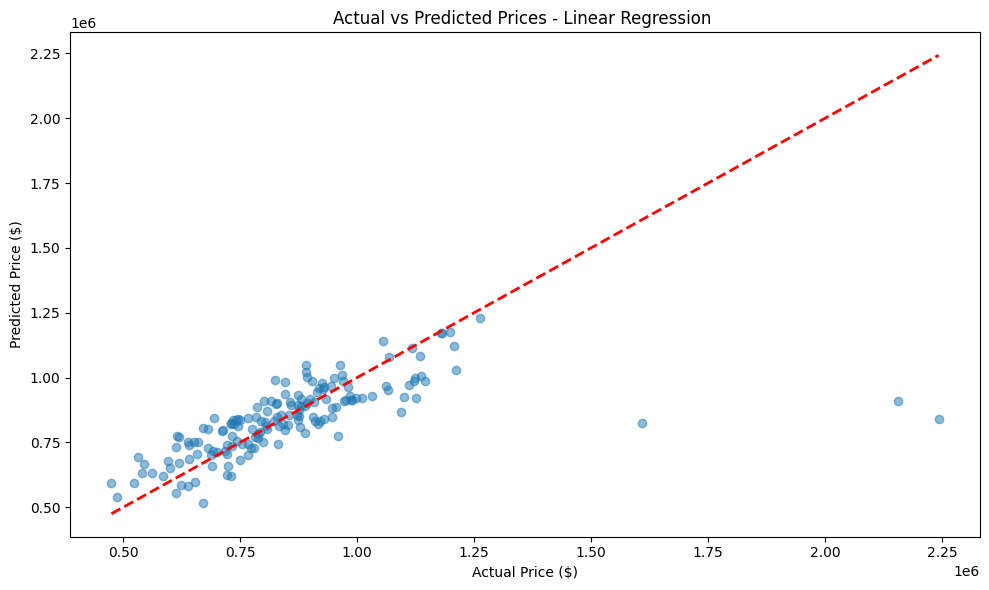

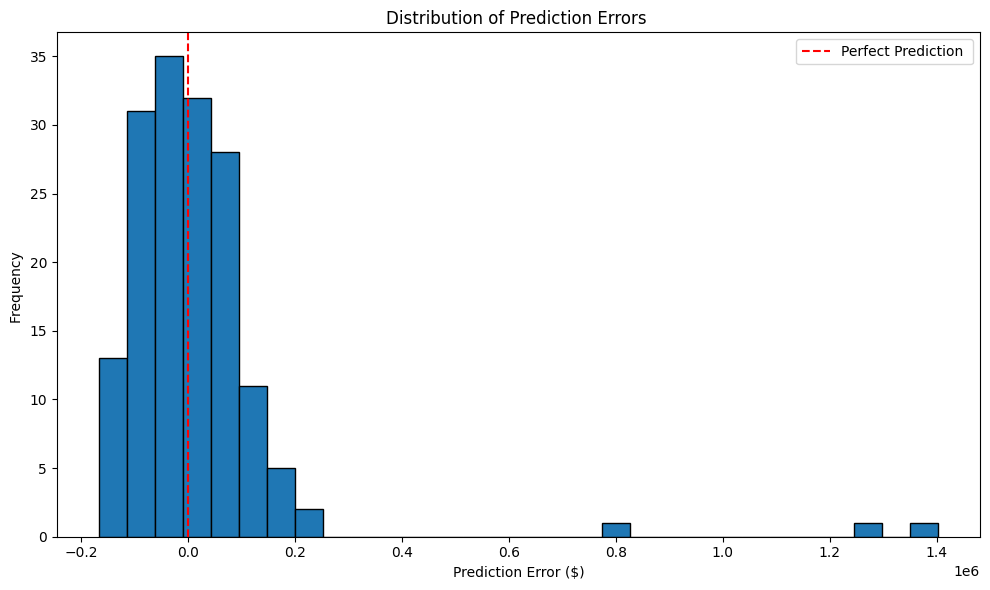

In [18]:
#=====================PART A============================================
# Use the better performing model
if test_score > test_score_dt:
 final_predictions = y_pred_test
 model_name = "Linear Regression "
else:
 final_predictions = y_pred_test_dt
 model_name = "Decision Tree"

# Chart 1: Actual vs Predicted Prices
plt.figure(figsize =(10 , 6))
plt.scatter(y_test , final_predictions , alpha =0.5)
plt.plot ([ y_test.min(),
          y_test.max()],
          [y_test.min(), y_test.max()],
          'r--', lw =2) # Perfect prediction line
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title(f'Actual vs Predicted Prices - { model_name }')
plt.tight_layout ()
plt.show ()

# Chart 2: Prediction Errors
errors = y_test - final_predictions
plt.figure(figsize =(10 , 6))
plt.hist(errors , bins =30, edgecolor ='black')
plt.xlabel('Prediction Error ($)')
plt.ylabel('Frequency ')
plt.title('Distribution of Prediction Errors ')
plt.axvline(x=0, color='r', linestyle ='--', label='Perfect Prediction ')
plt.legend ()
plt.tight_layout ()
plt.show ()

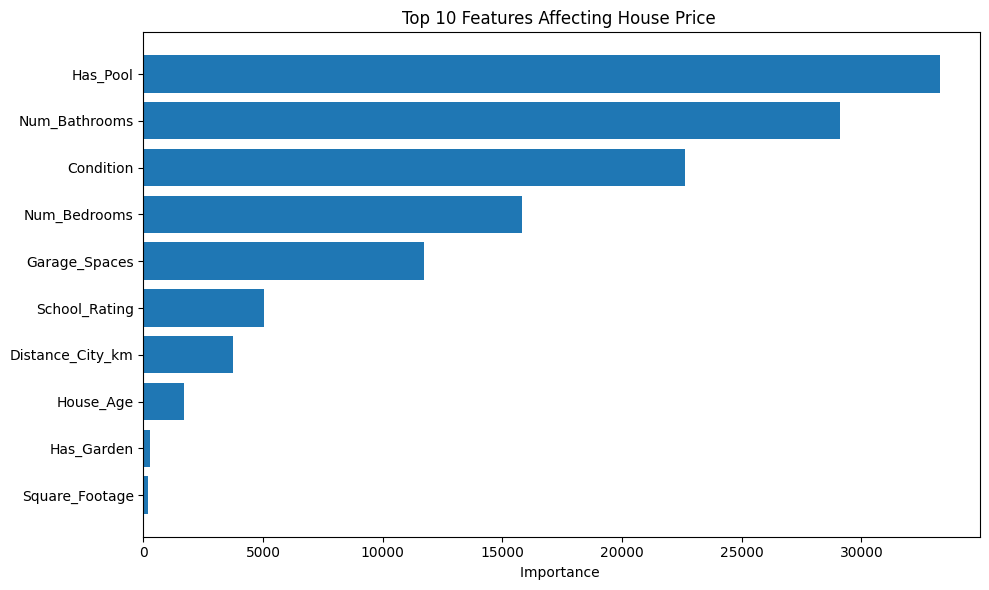


Top 5 Most Important Features:
     Feature   Importance 
     Has_Pool 33294.457403
Num_Bathrooms 29114.951033
    Condition 22649.798842
 Num_Bedrooms 15814.986270
Garage_Spaces 11716.352833


In [19]:
#============================================PART B==================================
# For Linear Regression : coefficients show impact
if test_score > test_score_dt :
# Get feature importance ( coefficients )
 importance = pd. DataFrame ({
'Feature ': numerical_features ,
'Importance ': abs(model1.coef_)
})
else:
# For Decision Tree: built -in importance
 importance = pd. DataFrame ({
'Feature ': numerical_features ,
'Importance ': model2. feature_importances_
})

# Sort by importance
importance = importance . sort_values ('Importance ', ascending =False)

# Visualize top 10 features
plt.figure(figsize =(10 , 6))
top_features = importance .head (10)
plt.barh(range(len( top_features )), top_features ['Importance '])
plt.yticks(range(len( top_features )), top_features ['Feature '])
plt.xlabel('Importance ')
plt.title('Top 10 Features Affecting House Price ')
plt.gca (). invert_yaxis ()
plt. tight_layout ()
plt.show ()

print("\nTop 5 Most Important Features:")
print( importance .head (5). to_string (index=False))

HOUSE PRICE PREDICTION MODEL ANALYSIS

Model Performance:  The linear regression has R² score of 0.386, which means that it explains 38.6% of the variation in house prices. The average prediction error here is $87,676, so it needs improvement for better business use. So to coclude, our R² score is moderate and prediction error is quite high, which means there's a need for enhancement in the model and we need more sophisticated algorithms.

Key Findings: The analysis reveals that Has_Pool has the strongest impact on price, followed by Num_Bathrooms and Condition, which suggests house benefits and property condition are important in determining price. Suprisingly, based onn the feature importance chart, square footage has the least direct impact on house price, this might be because its effect is captured through features like number of bedrooms and bathrooms.

Recommendations: For homeowners, my recommendation would be to improve property condition and add benefits like pools to maximize the value of their property. For real estate agents, I think they should emphasize condition ratings and bathroom and bedroom count when pricing properties. And finally, for investors: properties with poor condition rating but good features(location, good number of bedrooms/bathrooms, house size) might be undervalued opportunities for renovation and resale.

Limitations: Limitation of the model is that it doesn't account for market dynamics such as interest rates, seasonal fluctuations in demand. The R² score indicates that important factors are missing from the analysis. Additional data would significantly improve predictions. The model cannot be used for properties with unusual features (luxury estates, historic homes, etc) as these are outside the typical patterns of the model and will most likely produce inaccurate predictions.